In [1]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

single_image.shape

(28, 28)

In [5]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

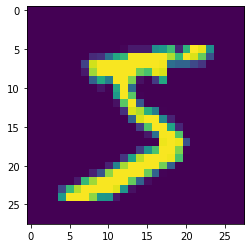

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
# convert labes to categoricals

y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, 10)

In [17]:
# normalize to divide by 255 to get 0 to 1

x_train = x_train/255
x_test = x_test/255

In [19]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

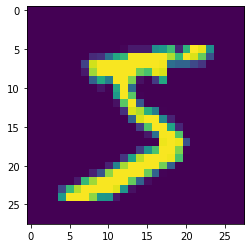

In [21]:
plt.imshow(scaled_image)

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
# batch size, width, height, color_channels

x_train = x_train.reshape(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000, 28, 28, 1)

# Train the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
# input shape for single image 28 x 28 x 1 (color channel)

model = Sequential()

model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# output layer
# use softmax for multiclass vs binary
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping


In [29]:
# could also set monitor = 'val_accuracy'

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(x_train,y_cat_train,epochs=12,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1337 - accuracy: 0.9602 - val_loss: 0.0546 - val_accuracy: 0.9817
Epoch 2/12
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 3/12
60000/60000 [==============================] - 18s 305us/sample - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 4/12
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0355 - val_accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 18s 306us/sample - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0438 - val_accuracy: 0.9864
Epoch 6/12
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0446 - val_accuracy: 0.9874


# Evaluate Model

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.133705,0.960183,0.054642,0.9817
1,0.046504,0.985767,0.041753,0.9869
2,0.030140,0.990050,0.044412,0.9850
3,0.019422,0.993733,0.035495,0.9894
4,0.013073,0.995783,0.043794,0.9864
5,0.011107,0.996483,0.044649,0.9874


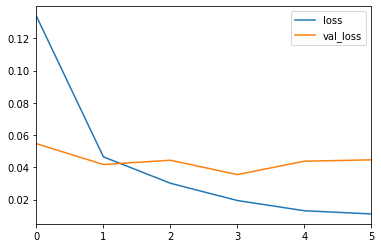

In [33]:
metrics[['loss', 'val_loss']].plot()

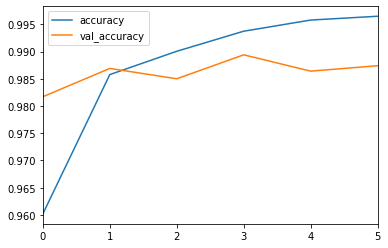

In [36]:
metrics[['accuracy', 'val_accuracy']].plot()

In [37]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04464855082649665, 0.9874]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
predictions = model.predict_classes(x_test)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
confusion_matrix(y_test, predictions)

array([[ 978,    0,    0,    1,    0,    0,    0,    0,    1,    0],
       [   3, 1116,    5,    3,    1,    1,    2,    1,    3,    0],
       [   3,    0, 1017,    0,    0,    0,    1,    7,    4,    0],
       [   0,    0,    3,  999,    0,    4,    0,    3,    1,    0],
       [   0,    0,    1,    0,  975,    0,    2,    0,    0,    4],
       [   1,    0,    1,    5,    0,  884,    1,    0,    0,    0],
       [   5,    2,    0,    0,    3,    3,  942,    0,    3,    0],
       [   1,    0,    8,    0,    1,    0,    0, 1015,    1,    2],
       [   5,    0,    2,    2,    1,    0,    0,    2,  959,    3],
       [   2,    0,    0,    0,   10,    5,    0,    0,    3,  989]])

In [42]:
import seaborn as sns

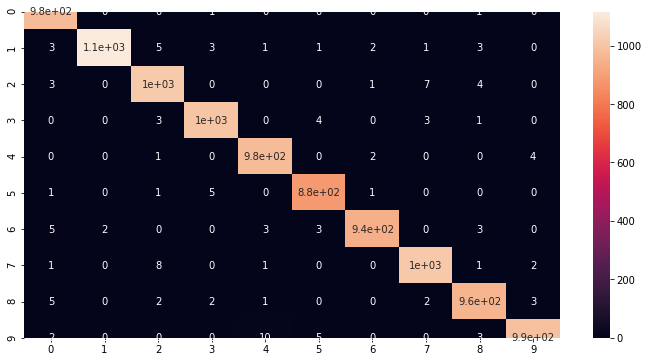

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [45]:
my_number = x_test[0]

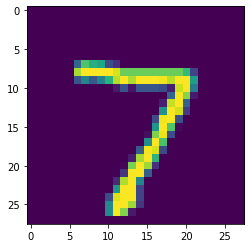

In [46]:
plt.imshow(my_number.reshape(28, 28))

In [47]:
# reshape to num_images, height, weight, number of color channels

model.predict_classes(my_number.reshape(1, 28, 28, 1))

array([7])